In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
#train-val folder
base = r'/content/drive/My Drive/Colab Notebooks/selected'
train_dir = os.path.join(base, 'train')
validation_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=125,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=62)

Found 4000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 125 steps, validate for 62 steps
Epoch 1/100
125/125 [==============================] - 32s 257ms/step - loss: 0.9816 - acc: 0.5893 - val_loss: 0.9017 - val_acc: 0.6260
Epoch 2/100
125/125 [==============================] - 31s 249ms/step - loss: 0.9646 - acc: 0.5915 - val_loss: 1.0940 - val_acc: 0.5499
Epoch 3/100
125/125 [==============================] - 32s 252ms/step - loss: 0.9524 - acc: 0.5943 - val_loss: 1.0049 - val_acc: 0.5867
Epoch 4/100
125/125 [==============================] - 31s 252ms/step - loss: 0.9431 - acc: 0.5997 - val_loss: 0.8638 - val_acc: 0.6512
Epoch 5/100
125/125 [==============================] - 34s 274ms/step - loss: 0.9266 - acc: 0.6120 - val_loss: 0.8937 - val_acc: 0.6457
Epoch 6/100
125/125 [==============================] - 34s 272ms/step - loss: 0.9150 - acc: 0.6170 - val_loss: 0.8528 - val_acc: 0.6603
Epoch 7/100
125/125 [==============================] - 33s 262ms/step - loss: 0.9042 - acc: 0.6280 - val_loss: 0.9595 - val_acc: 0.6053
Epoch

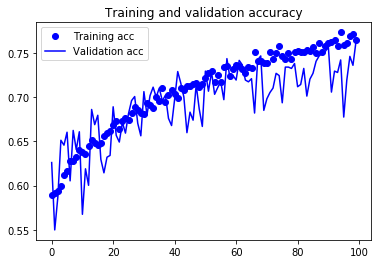

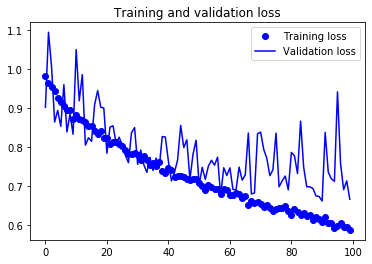

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from tensorflow.keras.applications import  InceptionV3

conv_base = InceptionV3(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

87916544/87910968 [==============================] - 2s 0us/step


In [0]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 31,242,532
Trainable params: 31,208,100
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 192


In [0]:
conv_base.trainable = False

In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Found 4000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 200 steps, validate for 100 steps
Epoch 1/30
200/200 - 40s - loss: 1.5331 - acc: 0.6133 - val_loss: 0.8995 - val_acc: 0.7765
Epoch 2/30
200/200 - 36s - loss: 0.7941 - acc: 0.6985 - val_loss: 0.9409 - val_acc: 0.7450
Epoch 3/30
200/200 - 37s - loss: 0.7121 - acc: 0.7205 - val_loss: 1.0412 - val_acc: 0.7445
Epoch 4/30
200/200 - 37s - loss: 0.6775 - acc: 0.7402 - val_loss: 1.0602 - val_acc: 0.7485
Epoch 5/30
200/200 - 38s - loss: 0.6517 - acc: 0.7473 - val_loss: 1.0072 - val_acc: 0.7405
Epoch 6/30
200/200 - 36s - loss: 0.6477 - acc: 0.7525 - val_loss: 0.8749 - val_acc: 0.7970
Epoch 7/30
200/200 - 36s - loss: 0.6507 - acc: 0.7523 - val_loss: 0.8494 - val_acc: 0.7900
Epoch 8/30
200/200 - 36s - loss: 0.6286 - acc: 0.7582 - val_loss: 0.9258 - val_acc: 0.7535
Epoch 9/30
200/200 - 36s - loss: 0.6370 - acc: 0.7567 - val_loss: 0.7269 - val_acc: 0.7880
Epoch 10/30
200/200 - 37s - loss: 0.5984 - acc: 0.7692 - val_loss: 0.8079 - val_acc: 0.7745
Epoch 11/30
200/200 - 37s - loss: 0.6013 - ac

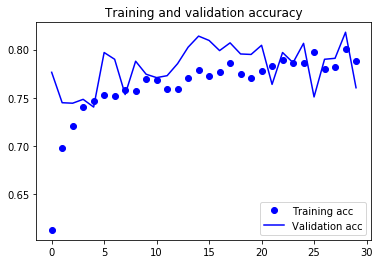

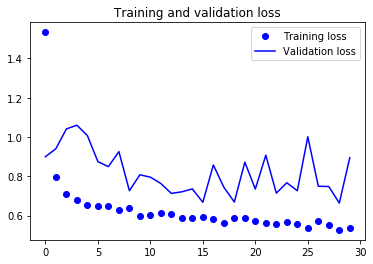

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from tensorflow.keras.applications import VGG16

conv_base2 = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model2 = models.Sequential()
model2.add(conv_base2)
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))

In [0]:
conv_base2.trainable = False

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model2.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Found 4000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 200 steps, validate for 100 steps
Epoch 1/30
200/200 - 36s - loss: 0.8912 - acc: 0.6867 - val_loss: 0.5978 - val_acc: 0.7570
Epoch 2/30
200/200 - 36s - loss: 0.6387 - acc: 0.7550 - val_loss: 0.4995 - val_acc: 0.8070
Epoch 3/30
200/200 - 36s - loss: 0.5945 - acc: 0.7685 - val_loss: 0.6146 - val_acc: 0.7565
Epoch 4/30
200/200 - 36s - loss: 0.5749 - acc: 0.7797 - val_loss: 0.4793 - val_acc: 0.8170
Epoch 5/30
200/200 - 36s - loss: 0.5342 - acc: 0.8002 - val_loss: 0.4935 - val_acc: 0.8100
Epoch 6/30
200/200 - 34s - loss: 0.5178 - acc: 0.8058 - val_loss: 0.4840 - val_acc: 0.8210
Epoch 7/30
200/200 - 35s - loss: 0.5379 - acc: 0.7987 - val_loss: 0.4723 - val_acc: 0.8200
Epoch 8/30
200/200 - 34s - loss: 0.5078 - acc: 0.8075 - val_loss: 0.4560 - val_acc: 0.8315
Epoch 9/30
200/200 - 35s - loss: 0.4944 - acc: 0.8112 - val_loss: 0.4453 - val_acc: 0.8375
Epoch 10/30
200/200 - 35s - loss: 0.4813 - acc: 0.8213 - val_loss: 0.5077 - val_acc: 0.8225
Epoch 11/30
200/200 - 35s - loss: 0.4739 - ac

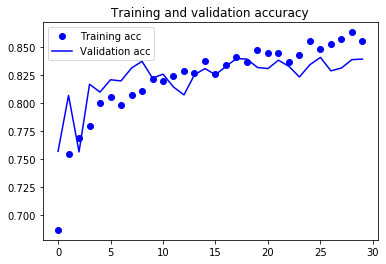

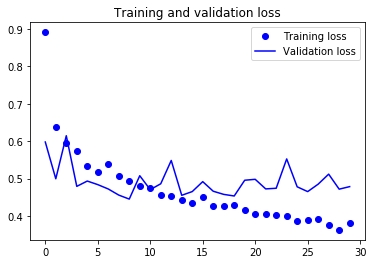

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

Found 799 images belonging to 4 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


test acc: 0.89


In [63]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://thumbs.img-sprzedajemy.pl/1000x901c/e0/15/14/kotki-brytyjskie-wegrow-sprzedam-523458646.jpg")

In [0]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 150, 150
img = image.load_img('/content/drive/My Drive/Colab Notebooks/olxcatbritish.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

y_new = model2.predict_classes(img)

In [95]:
print(train_generator.class_indices)
print("Predicted class=%s" % (y_new[0]))

{'bengal': 0, 'british': 1, 'maine': 2, 'persian': 3}
Predicted class=2


In [97]:
Image(url= "https://thumbs.img-sprzedajemy.pl/1000x901c/4d/01/95/koty-perskie-35-miesieczne-niebywalej-urody-nasielsk-521776565.jpg")

In [0]:
img_width, img_height = 150, 150
img = image.load_img('/content/drive/My Drive/Colab Notebooks/perssian_olx.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

y_new = model2.predict_classes(img)

In [100]:
print(train_generator.class_indices)
print("Predicted class=%s" % (y_new[0]))

{'bengal': 0, 'british': 1, 'maine': 2, 'persian': 3}
Predicted class=3


In [101]:
Image(url= "https://apollo-ireland.akamaized.net/v1/files/0q8wq4s78b1b3-PL/image;s=644x461")

In [102]:
img_width, img_height = 150, 150
img = image.load_img('/content/drive/My Drive/Colab Notebooks/bengal_olx.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

y_new = model2.predict_classes(img)
print(train_generator.class_indices)
print("Predicted class=%s" % (y_new[0]))

{'bengal': 0, 'british': 1, 'maine': 2, 'persian': 3}
Predicted class=0


In [110]:
Image(url= "https://apollo-ireland.akamaized.net/v1/files/nhhlazme7mkf-PL/image;s=644x461")

In [111]:
img_width, img_height = 150, 150
img = image.load_img('/content/drive/My Drive/Colab Notebooks/image.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

y_new = model2.predict_classes(img)
print(train_generator.class_indices)
print("Predicted class=%s" % (y_new[0]))

{'bengal': 0, 'british': 1, 'maine': 2, 'persian': 3}
Predicted class=2
